<a href="https://colab.research.google.com/github/3nya/test1/blob/main/test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline

In [2]:
from PIL import Image

import matplotlib.pyplot as plt
import numpy as np

In [3]:
def load_image( infilename ) :
    img = Image.open( infilename )
    img.load()
    data = np.asarray( img, dtype="int32" )
    return data

In [31]:
## upload file

from google.colab import files
uploaded = files.upload()

filename = next(iter(uploaded))

Saving rgbmap.png to rgbmap (2).png


In [32]:
# converting file to Image object
img = Image.open(filename)

#Image.open(filename)

In [33]:
(left, upper, right, lower) = (20, 20, 100, 100)
crop_test = img.crop((left, upper, right, lower))



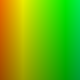

In [34]:
crop_test

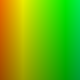

In [35]:
display(crop_test)

In [36]:
# putting all cropped images in list

listtest = []

# each cropped image is 25x25
for i in range(0, img.width-25, 25):
  for j in range(0, img.height-25, 25):
    listtest.append(img.crop((j, i, j+25, i+25)))
    crop = img.crop((j, i, j+25, i+25))
    ## display(crop)


In [67]:
# rgb values array test

for i in range(len(listtest)):
  #np.average(crop, axis=(0,1))
  hi = np.average((listtest[i]), axis=(0,1))
  print(hi)


[243.      68.4272   0.    ]
[237.5184 206.1328   0.    ]
[131.5568 243.       0.    ]
[ 12.4336 243.      23.8208]
[  0.     243.     154.4672]
[  0.     187.88   242.0352]
[  2.2016  47.8432 243.    ]
[ 97.0704   0.     243.    ]
[223.832    0.     226.7184]
[243.       0.     102.8752]
[218.      61.3248   0.    ]
[213.0624 184.8976   0.    ]
[117.9488 218.       0.    ]
[ 11.136  218.      21.3584]
[  0.     218.     138.5344]
[  0.     168.4848 217.1248]
[  1.9808  42.8752 218.    ]
[ 87.0432   0.     218.    ]
[200.7872   0.     203.3552]
[218.      0.     92.216]
[193.     54.224   0.   ]
[188.6048 163.6448   0.    ]
[104.36 193.     0.  ]
[  9.8288 193.      18.864 ]
[  0.    193.    122.584]
[  0.     149.1008 192.208 ]
[  1.7424  37.896  193.    ]
[ 76.9872   0.     193.    ]
[177.7152   0.     180.    ]
[193.       0.      81.5728]
[168.      47.1408   0.    ]
[164.1488 142.3904   0.    ]
[ 90.7728 168.       0.    ]
[  8.536  168.      16.3856]
[  0.     168.     106.6448]


In [85]:
def find_Avg_Color(cropped_average, original_array):
  r = cropped_average[0]
  g = cropped_average[1]
  b = cropped_average[2]

  current_lowest = 1000
  lowest_index = 0;
  for i in range(len(original_array)):
    total_difference = 0;
    curr_avg = np.average(original_array[i], axis=(0,1))
    #print(curr_avg)

    total_difference += abs(r - curr_avg[0])
    total_difference += abs(g - curr_avg[1])
    total_difference += abs(b - curr_avg[2])

    if (total_difference < current_lowest):
      current_lowest = total_difference
      lowest_index = i

  return lowest_index


In [52]:
#list contents

for i in range(len(listtest)):
  display(listtest[i])

In [104]:
test_img_file = files.upload()

test_img_filename = next(iter(test_img_file))
library_img = Image.open(test_img_filename)

Saving test.png to test (1).png


In [108]:
copy = library_img.copy()
library_arr = []

copy1 = library_img.copy().convert('RGB')
png = np.array(copy1)

counter = 0
for i in range(0, library_img.width + 100, 25):
  for j in range(0, library_img.height + 100, 25):
    library_arr.append(library_img.crop((j, i, j+25, i+25)))
    crop = library_img.crop((j, i, j+25, i+25))
    curr_avg = np.average(crop, axis=(0,1))



    new_img = listtest[find_Avg_Color(curr_avg, listtest)]
    # Image.putdata(data, scale=1.0, offset=0.0)
    # left, upper, right, and lower
    Image.Image.paste(copy, new_img, (j, i, j+25, i+25))

    counter+=1
    print("progress: " + str(counter) + "/" + str((((library_img.width+100)/25) * ((library_img.height+100)/25))))
    ## searching the original picture for a similar color

progress: 1/380.5312
progress: 2/380.5312
progress: 3/380.5312
progress: 4/380.5312
progress: 5/380.5312
progress: 6/380.5312
progress: 7/380.5312
progress: 8/380.5312
progress: 9/380.5312
progress: 10/380.5312
progress: 11/380.5312
progress: 12/380.5312
progress: 13/380.5312
progress: 14/380.5312
progress: 15/380.5312
progress: 16/380.5312
progress: 17/380.5312
progress: 18/380.5312
progress: 19/380.5312
progress: 20/380.5312
progress: 21/380.5312
progress: 22/380.5312
progress: 23/380.5312
progress: 24/380.5312
progress: 25/380.5312
progress: 26/380.5312
progress: 27/380.5312
progress: 28/380.5312
progress: 29/380.5312
progress: 30/380.5312
progress: 31/380.5312
progress: 32/380.5312
progress: 33/380.5312
progress: 34/380.5312
progress: 35/380.5312
progress: 36/380.5312
progress: 37/380.5312
progress: 38/380.5312
progress: 39/380.5312
progress: 40/380.5312
progress: 41/380.5312
progress: 42/380.5312
progress: 43/380.5312
progress: 44/380.5312
progress: 45/380.5312
progress: 46/380.53

In [106]:
copy1 = library_img.copy().convert('RGB')
png = np.array(copy1)
print(png)

[[[ 88  43  98]
  [ 93  48 103]
  [112  67 122]
  ...
  [107  59 135]
  [103  58 133]
  [103  58 133]]

 [[ 87  42  97]
  [ 94  49 104]
  [127  82 137]
  ...
  [107  59 135]
  [105  58 134]
  [104  59 134]]

 [[ 87  42  98]
  [ 89  44 100]
  [127  82 138]
  ...
  [107  59 135]
  [106  59 135]
  [106  60 135]]

 ...

 [[138 129 148]
  [144 135 154]
  [134 125 144]
  ...
  [ 24  11  29]
  [ 22   9  19]
  [ 19   6  13]]

 [[135 126 145]
  [134 125 144]
  [134 125 144]
  ...
  [ 28  15  28]
  [ 22   9  18]
  [ 19   7  13]]

 [[134 127 144]
  [135 128 145]
  [136 129 146]
  ...
  [ 25  13  17]
  [ 19   8  13]
  [ 17   6  12]]]


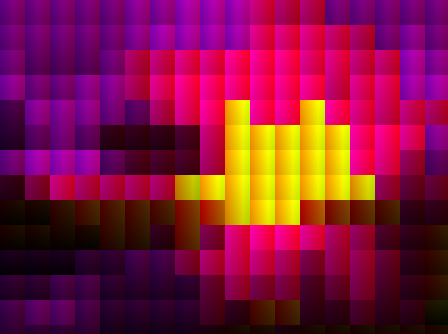

In [107]:
display(copy)

In [ ]:
## calculating dominant color
from skimage import io

average = listtest[0].mean(axis=0).mean(axis=0)

pixels = np.float32(img.reshape(-1, 3))

n_colors = 5
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 200, .1)
flags = cv2.KMEANS_RANDOM_CENTERS

_, labels, palette = cv2.kmeans(pixels, n_colors, None, criteria, 10, flags)
_, counts = np.unique(labels, return_counts=True)

dominant = palette[np.argmax(counts)]
display(dominant)

AttributeError: mean

In [ ]:
def dominant_color(arr):
  #test = io.imread(filename)[:, :, :-1]
  average = img.mean(axis=0).mean(axis=0)

  pixels = np.float32(img.reshape(-1, 3))

  n_colors = 5
  criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 200, .1)
  flags = cv2.KMEANS_RANDOM_CENTERS

  _, labels, palette = cv2.kmeans(pixels, n_colors, None, criteria, 10, flags)
  _, counts = np.unique(labels, return_counts=True)

  dominant = palette[np.argmax(counts)]
  return dominant

